<a href="https://colab.research.google.com/github/hws2002/Deep_Learning_with_Keras/blob/main/Chapter8/Chapter8_3_train_from_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 8.2에서 가져올것들
# train, validation, test dataset
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/Colab\ Notebooks/DEEP_LEARNING_KERAS/Chapter8/train.zip -d /content/

import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")
def make_subset(subset_name, start_index, end_index):

  for category in ('cat', 'dog'):
    dir = new_base_dir / subset_name / category

    if dir.exists(): # 이미 해당 파일이 존재한다면 삭제한다 (덮어씌우기)
      shutil.rmtree(dir)

    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
             for i in range(start_index, end_index)]

    for fname in fnames:
      shutil.copyfile(src = original_dir / fname,
                      dst = dir / fname)


make_subset("train",0,1000)
make_subset("validation",1000,1500)
make_subset("test",1500,2500)


In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size = (180,180),
    batch_size = 32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size = (180,180),
    batch_size = 32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size = (180,180),
    batch_size = 32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


# 사전 훈련된 모델을 사용한 특성 추출

In [3]:
import keras
conv_base = keras.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False,
    input_shape = (180,180,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

최종 특성 맵의 크기는 (5,5,512)임. 이 특성 위에 밀집 연결 층을 놓을 것임.

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    # 적절한 범위로 픽셀 값을 조정해 줌
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [6]:
train_features.shape

(2000, 5, 5, 512)

이제 규제를 위해 드롭아웃을 사용한 밀집 연결 분류기를 정의하고 방금 정의한 데이터와 레이블에서 훈련할 수 있음.


In [7]:
from keras import layers

inputs = keras.Input(shape = (5,5,512))

x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(loss = "binary_crossentropy",
              optimizer = "rmsprop",
              metrics = ['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "feature_extraction.keras",
        save_best_only = True,
        monitor = "val_loss")
]

history = model.fit(
    train_features,
    train_labels,
    epochs = 20,
    validation_data = (val_features, val_labels),
    callbacks = callbacks
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8758 - loss: 18.4926 - val_accuracy: 0.9610 - val_loss: 6.0602
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9709 - loss: 4.8992 - val_accuracy: 0.9760 - val_loss: 3.9005
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 1.1287 - val_accuracy: 0.9680 - val_loss: 5.8508
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9849 - loss: 1.9387 - val_accuracy: 0.9820 - val_loss: 4.0793
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9916 - loss: 0.8296 - val_accuracy: 0.9850 - val_loss: 3.1878
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.1191 - val_accuracy: 0.9780 - val_loss: 3.7844
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9942 - loss: 0.4173 - val_accuracy: 0.9770 - val_loss: 5.9417
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9974 - loss: 0.2016 - val_accuracy: 0.9800 - val_los

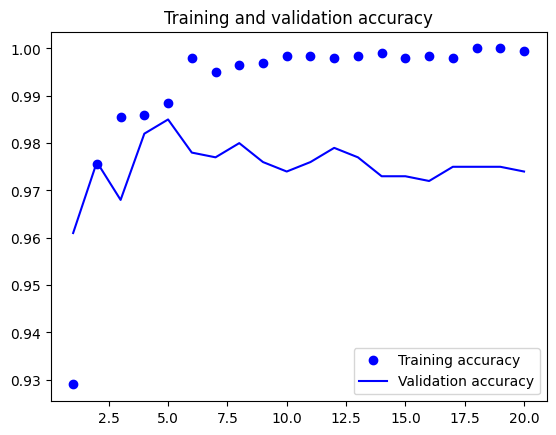

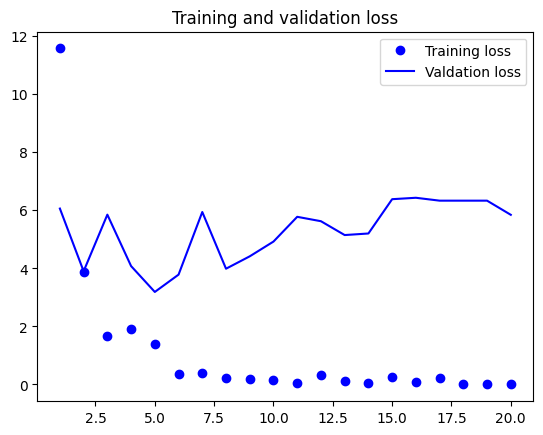

In [9]:
import matplotlib.pyplot as plt

plt.plot()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b-', label = 'Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b-', label = 'Valdation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

약 97%의 검증 정확도에 도달했음. 이전 절에서 처음부터 훈련시킨 작은 모델에서 얻은 것보다 훨씬 좋은 정확도임.  


# 데이터 증식을 사용한 특성 추출

In [32]:
conv_base = keras.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False
)

conv_base.trainable = False

이제 다음을 연결하여 새로운 모델을 만들 수 있음.

1. 데이터 증식 단계
2. 동결된 합성곱 기반 층
3. 밀집 분류기

In [33]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

inputs = keras.Input(shape = (180,180,3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "feature_extraction_with_data_augmentation.keras",
        save_best_only = True,
        monitor = 'val_loss'
    )
]

history = model.fit(
    train_dataset,
    epochs = 50,
    validation_data = validation_dataset,
    callbacks = callbacks)

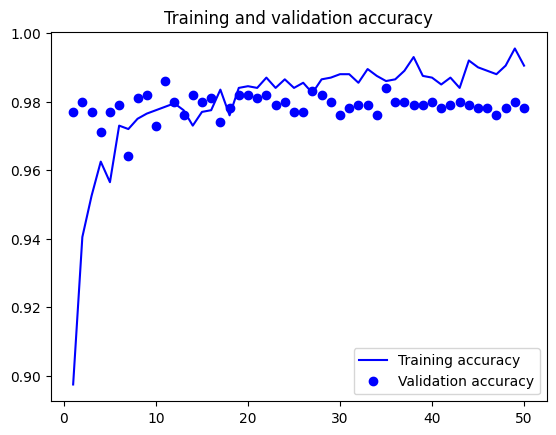

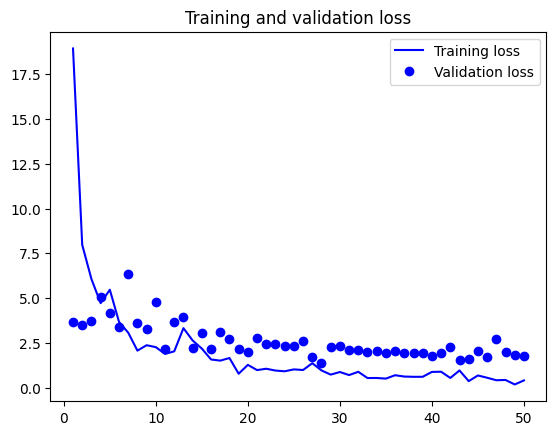

<Figure size 640x480 with 0 Axes>

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'b-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'bo', label = 'Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'b-', label = 'Training loss')
plt.plot(epochs, val_loss, 'bo', label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.figure()
plt.show()

테스트 정확도를 확인해보자

In [47]:
test_model = keras.models.load_model(
    'feature_extraction.keras'
)

test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"테스트 정확도 : {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9768 - loss: 4.6053
테스트 정확도 : 0.977


In [40]:
test_model = keras.models.load_model(
    'feature_extraction_with_data_augmentation.keras'
)

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도 : {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9749 - loss: 3.3526
테스트 정확도 : 0.979


# 사전 훈련된 모델 미세 조정하기

conv_base의 마지막 3개의 합성곱 층을 미세 조정해보자

In [41]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False

이제 이 모델의 미세 조정을 시작해보자

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(learning_rate = 1e-5),
              metrics = ['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "fine_tuning.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks = callbacks
)

In [46]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도 : {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.9814 - loss: 1.6109
테스트 정확도 : 0.980
